In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbalancedPipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [14]:
train_data = pd.read_csv("train.csv")
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [15]:
original_data = pd.read_csv("Churn_Modelling.csv")
original_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [16]:
original_data.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
original_data.dropna(inplace=True)
original_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [17]:
train_data.drop(columns=["id", "CustomerId", "Surname"], axis=1, inplace=True)
train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [18]:
data = pd.concat([original_data, train_data])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [19]:
X = data.drop('Exited', axis=1)
y = data["Exited"]

In [20]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

class_weights = calculate_class_weights(y)
print("Class weights:", class_weights)

Class weights: {0: 0.6338386215987195, 1: 2.3679212099894476}


In [21]:
class_weights = calculate_class_weights(y)
scale_pos_weight = class_weights[1] / class_weights[0]

In [22]:
numeric_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
one_hot_cols = ["Geography", "Gender"]
no_op_cols = ["HasCrCard", "IsActiveMember", "NumOfProducts"]

no_op_transformer = Pipeline(steps=[
    ("no_op", FunctionTransformer(lambda x: x))
])

scaler_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

one_hot_transformer = Pipeline(steps=[
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing_pipeline = ColumnTransformer(transformers=[
    ("numeric", scaler_transformer, numeric_cols),
    ("one_hot", one_hot_transformer, one_hot_cols),
    ("no_op", no_op_transformer, no_op_cols)
])


model_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_pipeline),
    ('model', LGBMClassifier(scale_pos_weight=scale_pos_weight))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=skf,
                            scoring="f1_macro")

for i, score in enumerate(cv_scores):
    print(f"Fold {i + 1} score: {score * 100:.2f}%")

print("---" * 8)
print(f"Ortalama F1-Skoru : {cv_scores.mean() * 100:.2f}%")
print(f"Standart Sapma: {cv_scores.std() * 100:.2f}%")

[LightGBM] [Info] Number of positive: 23712, number of negative: 88308
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 112020, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211676 -> initscore=-1.314849
[LightGBM] [Info] Start training from score -1.314849
[LightGBM] [Info] Number of positive: 23711, number of negative: 88309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 112020, number of used features: 13
[LightGBM] [Info] 

In [24]:
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

[LightGBM] [Info] Number of positive: 29639, number of negative: 110386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 140025, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211669 -> initscore=-1.314892
[LightGBM] [Info] Start training from score -1.314892


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     27687
           1       0.54      0.79      0.64      7320

    accuracy                           0.82     35007
   macro avg       0.74      0.81      0.76     35007
weighted avg       0.85      0.82      0.83     35007

Confusion Matrix
[[22781  4906]
 [ 1548  5772]]


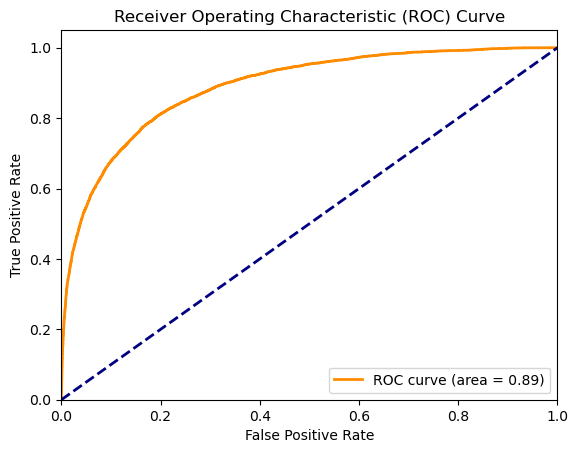

In [26]:
y_proba = model_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()